<a href="https://colab.research.google.com/github/saarucore/MLprojects/blob/main/svmfd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,72762.000000,72762.000000,72762.000000,72762.000000,72762.000000,72762.000000,72762.000000,72762.000000,72762.000000,72762.000000,...,72761.000000,72761.000000,72761.000000,72761.000000,72761.000000,72761.000000,72761.000000,72761.000000,72761.000000,72761.000000
mean,35421.721393,-0.252793,-0.025068,0.679836,0.168592,-0.271527,0.098343,-0.113653,0.056163,0.011852,...,-0.028557,-0.106414,-0.038870,0.006218,0.135401,0.023291,0.002323,0.002924,97.108226,0.002446
std,14625.497013,1.879338,1.662033,1.410956,1.373059,1.389137,1.305206,1.252884,1.232558,1.157224,...,0.738660,0.637502,0.621874,0.596572,0.440032,0.498207,0.385141,0.324495,269.975271,0.049401
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,29277.000000,-1.012186,-0.594244,0.192595,-0.724881,-0.889282,-0.638717,-0.604310,-0.141888,-0.675488,...,-0.225675,-0.525713,-0.178837,-0.324917,-0.128354,-0.328415,-0.063009,-0.005872,7.680000,0.000000
50%,38513.000000,-0.248766,0.072712,0.769142,0.187612,-0.304521,-0.152489,-0.073881,0.067419,-0.074741,...,-0.060065,-0.080167,-0.050852,0.062493,0.173624,-0.075160,0.009423,0.022816,26.560000,0.000000
75%,46509.000000,1.153493,0.727194,1.401675,1.052604,0.265847,0.492567,0.420320,0.346750,0.658513,...,0.116054,0.308507,0.079847,0.403627,0.422224,0.302100,0.082502,0.075776,88.880000,0.000000
max,54848.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [ ]:
data.shape

(72762, 31)

Exploratory Data Analysis

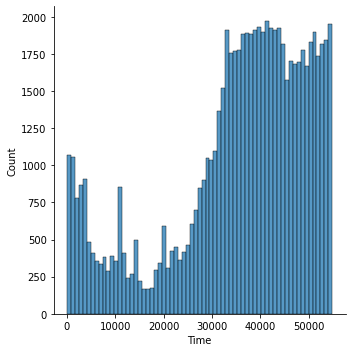

In [ ]:
# Time column
sns.displot(x = data.Time)

0.0    72583
1.0      178
Name: Class, dtype: int64


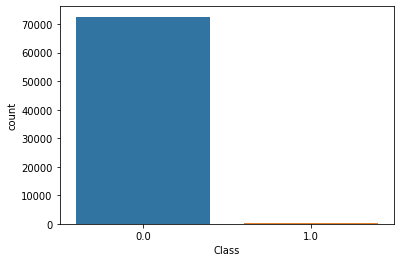

In [ ]:
# Fraud
print(data.Class.value_counts())
sns.countplot(x = data.Class)

Text(0, 0.5, 'Amount')

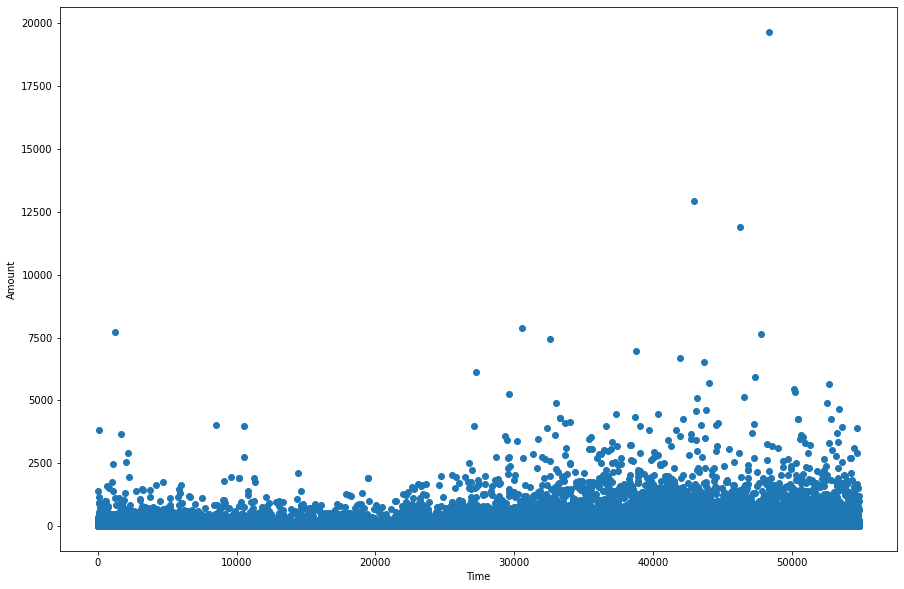

In [ ]:
# Amount vs Fraud
plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(y = data.Amount, x = data.Time)
plt.xlabel('Time')
plt.ylabel('Amount')

data preprocessing

In [ ]:
data.drop('Time', axis = 1, inplace = True)

In [ ]:
# Taking only 50000 records
data_new = data.loc[:25000, :]

X = data_new.drop('Class', axis = 1)
Y = data_new.Class

X.shape

(25001, 29)

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 0)
X, Y = sampler.fit_resample(X,Y)

In [ ]:
Y.value_counts()

0.0    24913
1.0    24913
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = 0.3, random_state = 0)

Model Building

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy = []

# Linear
svc_l = SVC(kernel = 'linear')
svc_l.fit(xtrain,ytrain)
y_pred_l = svc_l.predict(xtest)
accuracy.append(accuracy_score(y_pred_l,ytest))

#RBF
svc_r = SVC(kernel = 'rbf')
svc_r.fit(xtrain,ytrain)
y_pred_r = svc_r.predict(xtest)
accuracy.append(accuracy_score(y_pred_r,ytest))

#Polynomial
svc_p = SVC(kernel = 'poly')
svc_p.fit(xtrain,ytrain)
y_pred_r = svc_p.predict(xtest)
accuracy.append(accuracy_score(y_pred_r,ytest))

print("Linear SVM Accuracy= ", accuracy[0])
print("RBF SVM Accuracy= ", accuracy[1])
print("Polynomial SVM Accuracy= ", accuracy[2])

Linear SVM Accuracy=  0.9933770404067434
RBF SVM Accuracy=  0.9610650254214611
Polynomial SVM Accuracy=  0.6704575862991704
